# Assignment 6: Apply NB

<ol>
    <li>Minimum data points need to be considered for people having 4GB RAM is <strong>50k</strong> and for 8GB RAM is <strong>100k</strong></li>
    <li>When you are using ramdomsearchcv or gridsearchcv you need not split the data into X_train,X_cv,X_test. As the above methods use kfold. The model will learn better if train data is more so splitting to X_train,X_test will suffice.</li>
    <li>If you are writing for loops to tune your model then you need split the data into X_train,X_cv,X_test.</li>
    <li>While splitting the data explore stratify parameter. </li>
    <li><strong>Apply Multinomial NB on these feature sets</strong></li>
        <ul>
            <li>Features that need to be considered</li> 
                <dl>
                  <dt>essay</dt>
                    <dd>while encoding essay, try to experiment with the max_features and n_grams parameter of vectorizers and see if it increases AUC score.</dd>
                  <dt>categorical features</dt>
                  <dd> - teacher_prefix</dd>
                  <dd> - project_grade_category</dd>
                  <dd> - school_state</dd>
                  <dd> - clean_categories</dd>
                  <dd> - clean_subcategories</dd>
                  <dt>numerical features</dt>
                  <dd> - price</dd>
                  <dd> - teacher_number_of_previously_posted_projects</dd>
                  <dd>while encoding the numerical features check <a href='https://imgur.com/ldZA1zg'>this</a> and <a href='https://ac-classroom-production.s3.amazonaws.com/public/COMMENT/Annotation_2020-05-21_225912_0lyZzN8.jpg'>this</a></dd>
                </dl>    
            <li><font color='red'>Set 1</font>: categorical, numerical features + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + preprocessed_eassay (TFIDF)</li>
        </ul>
    <li><strong>The hyper paramter tuning(find best alpha:smoothing parameter)</strong>
        <ul>
    <li>Consider alpha values in range: 10^-5 to 10^2 like [0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]</li>
    <li>Explore class_prior = [0.5, 0.5] parameter which can be present in MultinomialNB function(go through <a href='https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html'>this</a> ) then check how results might change.
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>For hyper parameter tuning using k-fold cross validation(use GridsearchCV or RandomsearchCV)/simple cross validation data (write for loop to iterate over hyper parameter values)</li>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/hUv6aEy.jpg' width=300px><dd>-while plotting take log(alpha) on your X-axis so that it will be more readable</dd></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='https://imgur.com/q2P65L5.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
        <img src='https://i.imgur.com/IdN5Ctv.png' width=300px><dd>-plot the confusion matrix in heatmaps, while plotting the confusion matrix go through the <a href='https://stackoverflow.com/questions/61748441/how-to-fix-the-values-displayed-in-a-confusion-matrix-in-exponential-form-to-nor'>link </a>
</dd></li>
        </ul>
<li>find the top 20 features from either from feature <font color='red'>Set 1</font> or feature <font color='red'>Set 2</font> using values of `feature_log_prob_ ` parameter of `MultinomialNB` 
(https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) and print <strong>BOTH</strong> positive as well as negative corresponding feature names. <dd> - go through the <a href='https://imgur.com/mWvE7gj'>link </a> </dd>
    </li>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

<h1>2. Naive Bayes </h1>

## 1.1 Loading Data

In [187]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [188]:
#make sure you are loading atleast 50k datapoints
#you can work with features of preprocessed_data.csv for the assignment.
# If you want to add more features, you can add. (This is purely optional, not mandatory)
 
import pandas
data = pandas.read_csv('/content/drive/MyDrive/6_Donors_choose_NB/preprocessed_data.csv', nrows = 100000)
# data  = pd.read_csv('preprocessed_data.csv', nrows=50000) # you can take less number of rows like this


In [189]:
data.head(3)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03
2,ca,mrs,grades_prek_2,10,1,literacy_language,literacy,having class 24 students comes diverse learner...,329.00


In [190]:
data.shape

(100000, 9)

In [191]:
data.isnull().sum()

school_state                                    0
teacher_prefix                                  0
project_grade_category                          0
teacher_number_of_previously_posted_projects    0
project_is_approved                             0
clean_categories                                0
clean_subcategories                             0
essay                                           0
price                                           0
dtype: int64

In [192]:
data.dtypes

school_state                                     object
teacher_prefix                                   object
project_grade_category                           object
teacher_number_of_previously_posted_projects      int64
project_is_approved                               int64
clean_categories                                 object
clean_subcategories                              object
essay                                            object
price                                           float64
dtype: object

<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [193]:
# write your code in following steps for task 1
# 1. Split your data.
# 2. Perform Bag of Words Vectorization of text data.
# 3. Perform tfidf vectorization of text data.
# 4. perform one-hot encoding of categorical features.
# 5. perform normalization of numerical features
# 6. For set 1 stack up all the features using hstack()
# 7. For set 2 stack up all the features using hstack()
# 8. Perform hyperparameter tuning and represent the training and cross-validation AUC scores for different 'alpha' values, using a 2D line plot.
# 9. Find the best hyperparameter 'alpha' and fit the model. Plot ROC-AUC curve(by obtaining the probabilities using 'predict proba' method)
# 10. Plot confusion matrix based on the best threshold value
# 11. Either for the model in set 1 or in set 2, print the top 20 features(you have to print the names, not the indexes) associated with the positive and negative classes each.
# 12. Summarize your observations and compare both the models(ie., from set 1 and set 2) in terms of optimal hyperparameter value, train AUC and test AUC scores. 
# 13. You can use Prettytable or any other tabular format for comparison.


# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
    

In [194]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/

import pickle
from tqdm import tqdm
import os

from collections import Counter

In [195]:
features =data.copy().drop(['project_is_approved'],axis=1)
y=data['project_is_approved']

In [196]:
data.groupby('project_is_approved').count()

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price
project_is_approved,,,,,,,,
0,15183,15183,15183,15183,15183,15183,15183,15183
1,84817,84817,84817,84817,84817,84817,84817,84817


In [197]:
from sklearn.model_selection import train_test_split

x_train,x_test, y_train_1, y_test = train_test_split(features, y, stratify=y, test_size=0.25)
x_train, x_cv, y_train, y_cv = train_test_split(x_train, y_train_1, test_size=0.33, stratify=y_train_1)

In [198]:
# Split the dataset 
# 1) If you want to apply simple cross-validation, split the dataset into 3 parts (ie., train, CV and test sets)
# 2) If you want to apply K-fold CV (or) GridSearch Cross Validation (or) Randomized Search Cross Validation, just split the dataset into 2 parts (ie., train and test sets)



<h2>1.3 Make Data Model Ready: encoding essay, and project_title</h2>

In [199]:
from collections import Counter
my_counter = Counter()
for word in x_train['essay'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)

sorted_bow_dict = dict(sorted(cat_dict.items(), key=lambda kc: kc[1]))

In [200]:
# Apply Bag of Words (BOW) vectorization on 'Preprocessed_Essay' 
# Apply Bag of Words (BOW) vectorization on 'Preprocessed_Title' (Optional)

from sklearn.feature_extraction.text import CountVectorizer
vectorizer_bow = CountVectorizer(ngram_range=(1,2), vocabulary=list(sorted_bow_dict.keys()), lowercase=False, binary=True)
#vectorizer.fit(x_train['essay'].values)

x_train_essay_bow = vectorizer_bow.fit_transform(x_train['essay'].values) # fit has to happen on only train data
x_cv_essay_bow = vectorizer_bow.transform(x_cv['essay'].values)
x_test_essay_bow = vectorizer_bow.transform(x_test['essay'].values)

# Note- apply fit_transform only on training dataset, because if we apply same fit 
#       transformation on both datset it creates data leakage
# Note- if we apply fit and transform seperately it takes more time than applying fit_transform

In [201]:
cat = []
cat.extend(vectorizer_bow.get_feature_names())
len(cat)

41733

In [202]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

print('-'*50)

print("After vectorizations")
print(x_train_essay_bow.shape, y_train.shape)
print(x_test_essay_bow.shape, y_test.shape)

(50250, 8) (50250,)
(25000, 8) (25000,)
--------------------------------------------------
After vectorizations
(50250, 41733) (50250,)
(25000, 41733) (25000,)


In [203]:
from collections import Counter
my_counter = Counter()
for word in x_train['essay'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)

sorted_tf_dict = dict(sorted(cat_dict.items(), key=lambda kc: kc[1]))

In [204]:
# Apply TF-IDF vectorization on 'Preprocessed_Essay' 
# Apply TF-IDF vectorization on 'Preprocessed_Title' (Optional)

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_tfidf = TfidfVectorizer(stop_words="english", ngram_range=(1,2), vocabulary=list(sorted_tf_dict.keys()), lowercase=False, binary=True)

x_train_essay_tfidf = vectorizer_tfidf.fit_transform(x_train['essay'].values) # fit has to happen on only train data
x_cv_essay_tfidf = vectorizer_tfidf.transform(x_cv['essay'].values) # fit has to happen on only train data
x_test_essay_tfidf = vectorizer_tfidf.transform(x_test['essay'].values)


<h2>1.4 Make Data Model Ready: encoding numerical, categorical features</h2>

In [205]:
data.head(2)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03


In [206]:
# Apply One-Hot Encoding on the categorical features either using OneHotEncoder() (or) CountVectorizer(binary=True)
# Apply Normalization on the numerical features using Normalizer().

from collections import Counter
my_counter = Counter()
for word in x_train['school_state'].values:
    my_counter.update(word.split())
cat_dict = dict(my_counter)
sorted_school_dict = dict(sorted(cat_dict.items(), key=lambda kc: kc[1]))

vectorizer_school = CountVectorizer(vocabulary=list(sorted_school_dict.keys()), lowercase=False, binary=True)
x_train_school_ohe = vectorizer_school.fit_transform(x_train['school_state'].values)
x_cv_school_ohe = vectorizer_school.transform(x_cv['school_state'].values)
x_test_school_ohe = vectorizer_school.transform(x_test['school_state'].values)

from collections import Counter
my_counter = Counter()
for word in x_train['teacher_prefix'].values:
    my_counter.update(word.split())
cat_dict = dict(my_counter)
sorted_teacher_dict = dict(sorted(cat_dict.items(), key=lambda kc: kc[1]))

vectorizer_teacher = CountVectorizer(vocabulary=list(sorted_teacher_dict.keys()), lowercase=False, binary=True)
x_train_teacher_ohe = vectorizer_teacher.fit_transform(x_train['teacher_prefix'].values)
x_cv_teacher_ohe = vectorizer_teacher.transform(x_cv['teacher_prefix'].values)
x_test_teacher_ohe = vectorizer_teacher.transform(x_test['teacher_prefix'].values)

from collections import Counter
my_counter = Counter()
for word in x_train['project_grade_category'].values:
    my_counter.update(word.split())
cat_dict = dict(my_counter)
sorted_grade_dict = dict(sorted(cat_dict.items(), key=lambda kc: kc[1]))

vectorizer_grade = CountVectorizer(vocabulary=list(sorted_grade_dict.keys()), lowercase=False, binary=True)
x_train_grade_ohe = vectorizer_grade.fit_transform(x_train['project_grade_category'].values)
x_cv_grade_ohe = vectorizer_grade.transform(x_cv['project_grade_category'].values)
x_test_grade_ohe = vectorizer_grade.transform(x_test['project_grade_category'].values)

from collections import Counter
my_counter = Counter()
for word in x_train['clean_categories'].values:
    my_counter.update(word.split())
cat_dict = dict(my_counter)
sorted_clean_cat_dict = dict(sorted(cat_dict.items(), key=lambda kc: kc[1]))

vectorizer_clean_cat = CountVectorizer(vocabulary=list(sorted_clean_cat_dict.keys()), lowercase=False, binary=True)
x_train_clean_category_ohe = vectorizer_clean_cat.fit_transform(x_train['clean_categories'].values)
x_cv_clean_category_ohe = vectorizer_clean_cat.fit_transform(x_cv['clean_categories'].values)
x_test_clean_category_ohe = vectorizer_clean_cat.transform(x_test['clean_categories'].values)

from collections import Counter
my_counter = Counter()
for word in x_train['clean_subcategories'].values:
    my_counter.update(word.split())
cat_dict = dict(my_counter)
sorted_clean_sub_cat_dict = dict(sorted(cat_dict.items(), key=lambda kc: kc[1]))

vectorizer_clean_sub_cat = CountVectorizer(vocabulary=list(sorted_clean_sub_cat_dict.keys()), lowercase=False, binary=True)
x_train_clean_subcategory_ohe = vectorizer_clean_sub_cat.fit_transform(x_train['clean_subcategories'].values)
x_cv_clean_subcategory_ohe = vectorizer_clean_sub_cat.transform(x_cv['clean_subcategories'].values)
x_test_clean_subcategory_ohe = vectorizer_clean_sub_cat.transform(x_test['clean_subcategories'].values)


In [207]:
from sklearn.preprocessing import Normalizer

# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
# -1 means you don't need to specify the dimension number or it will automatically input remaining dimensions

normalizer_1 = Normalizer()
x_train_price_norm = normalizer_1.fit_transform(x_train['price'].values.reshape(-1,1))
x_cv_price_norm = normalizer_1.transform(x_cv['price'].values.reshape(-1,1))
x_test_price_norm = normalizer_1.transform(x_test['price'].values.reshape(-1,1))

normalizer = Normalizer()
x_train_posts_norm = normalizer.fit_transform(x_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
x_cv_posts_norm = normalizer.transform(x_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
x_test_posts_norm = normalizer.transform(x_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))


In [208]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

# set-1, with BOW
x_tr = hstack((x_train_essay_bow, x_train_school_ohe, x_train_teacher_ohe, x_train_grade_ohe, x_train_clean_category_ohe, x_train_clean_subcategory_ohe, x_train_price_norm, x_train_posts_norm)).tocsr()
x_c = hstack((x_cv_essay_bow, x_cv_school_ohe, x_cv_teacher_ohe, x_cv_grade_ohe, x_cv_clean_category_ohe, x_cv_clean_subcategory_ohe, x_cv_price_norm, x_cv_posts_norm)).tocsr()
x_te = hstack((x_test_essay_bow, x_test_school_ohe, x_test_teacher_ohe, x_test_grade_ohe, x_test_clean_category_ohe, x_test_clean_subcategory_ohe, x_test_price_norm, x_test_posts_norm)).tocsr()

#set - 2 , with tfidf 
x_tr_tf = hstack((x_train_essay_tfidf, x_train_school_ohe, x_train_teacher_ohe, x_train_grade_ohe, x_train_clean_category_ohe, x_train_clean_subcategory_ohe, x_train_price_norm, x_train_posts_norm)).tocsr()
x_c_tf = hstack((x_cv_essay_tfidf, x_cv_school_ohe, x_cv_teacher_ohe, x_cv_grade_ohe, x_cv_clean_category_ohe, x_cv_clean_subcategory_ohe, x_cv_price_norm, x_cv_posts_norm)).tocsr()
x_te_tf = hstack((x_test_essay_tfidf, x_test_school_ohe, x_test_teacher_ohe, x_test_grade_ohe, x_test_clean_category_ohe, x_test_clean_subcategory_ohe, x_test_price_norm, x_test_posts_norm)).tocsr()

print(x_tr.shape, y_train.shape)
print(x_c.shape,y_cv.shape)
print(x_te.shape, y_test.shape)

print('*'*100)

print(x_tr_tf.shape, y_train.shape)
print(x_c_tf.shape,y_cv.shape)
print(x_te_tf.shape, y_test.shape)

(50250, 41834) (50250,)
(24750, 41834) (24750,)
(25000, 41834) (25000,)
****************************************************************************************************
(50250, 41834) (50250,)
(24750, 41834) (24750,)
(25000, 41834) (25000,)


<h2>1.5 Appling NB on different kind of featurization as mentioned in the instructions</h2>

<br>Apply NB on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

#### Set 1

In [209]:
# Perform Hyperparameter Tuning.
# Plot the training and the CV AUC scores, for different values of 'alpha', using a 2D line plot




In [210]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your tr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

In [211]:
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
import math

train_auc = []
cv_auc = []
log_alphas = []

alphas = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10,  100,  1000]

for i in tqdm(alphas):
    nb = MultinomialNB(alpha = i,class_prior=[0.5,0.5])
    nb.fit(x_tr, y_train)

    y_train_pred = batch_predict(nb, x_tr)    
    y_cv_pred = batch_predict(nb, x_c)
    

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

for a in tqdm(alphas):
    b = math.log(a)
    log_alphas.append(b)

100%|██████████| 9/9 [00:00<00:00, 55594.60it/s]


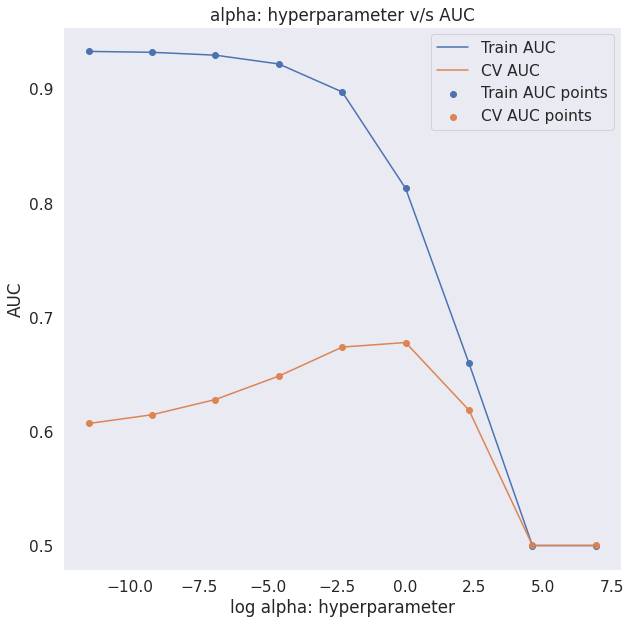

In [212]:
plt.figure(figsize=(10,10))
plt.plot(log_alphas, train_auc, label='Train AUC')
plt.plot(log_alphas, cv_auc, label='CV AUC')

plt.scatter(log_alphas, train_auc, label='Train AUC points')
plt.scatter(log_alphas, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("log alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("alpha: hyperparameter v/s AUC")
plt.grid()
plt.show()

In [213]:
from sklearn.model_selection import GridSearchCV

nb = MultinomialNB(class_prior=[0.5,0.5])

parameters = {'alpha':[0.00001, 0.0001,0.001, 0.01, 0.1,0.5,0.8, 1, 10,  100,  1000]}

clf = GridSearchCV(nb, parameters, cv= 10, scoring='roc_auc',return_train_score=True,verbose=2)

clf.fit(x_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

Fitting 10 folds for each of 11 candidates, totalling 110 fits
[CV] END ........................................alpha=1e-05; total time=   0.1s
[CV] END ........................................alpha=1e-05; total time=   0.1s
[CV] END ........................................alpha=1e-05; total time=   0.1s
[CV] END ........................................alpha=1e-05; total time=   0.1s
[CV] END ........................................alpha=1e-05; total time=   0.1s
[CV] END ........................................alpha=1e-05; total time=   0.1s
[CV] END ........................................alpha=1e-05; total time=   0.1s
[CV] END ........................................alpha=1e-05; total time=   0.1s
[CV] END ........................................alpha=1e-05; total time=   0.1s
[CV] END ........................................alpha=1e-05; total time=   0.1s
[CV] END .......................................alpha=0.0001; total time=   0.1s
[CV] END .....................................

In [214]:
# Print params
print(clf.best_estimator_)
print(clf.score(x_tr, y_train))
print(clf.score(x_c, y_cv))

MultinomialNB(alpha=0.5, class_prior=[0.5, 0.5])
0.8479187529562191
0.6818110819885058


In [215]:
# Obtain the optimal value for 'alpha' and using the obtained optimal 'alpha' value, fit a multinomial naive bayes model, on the train data,
# Note: If you have split the datase into 3 parts (ie., train, cv and test sets) in the beginning, then the training data for this final model would be (train set + cv set)
# Make class label and probability predictions on the train and test data.


In [216]:
from scipy.sparse import vstack # for vertical stacking
x = vstack((x_tr,x_c)).tocsr()
print(x.shape)
print(y_train_1.shape)
x_tr.shape

(75000, 41834)
(75000,)


(50250, 41834)

In [217]:
nb_1 = MultinomialNB(alpha = 0.1, class_prior=[0.5,0.5])
nb_1.fit(x,y_train_1)

MultinomialNB(alpha=0.1, class_prior=[0.5, 0.5])

In [218]:
# Pick the best threshold among the probability estimates, such that it has to yield maximum value for TPR*(1-FPR)
# Plot the confusion matrices(each for train and test data) afer encoding the predicted class labels, on the basis of the best threshod probability estimate.


In [219]:
from sklearn.metrics import confusion_matrix

#function to get heatmap confusion matrix
def get_confusion_matrix(clf,X_te,y_test):
    y_pred = clf.predict(X_te)
    df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
    df_cm.columns = ['Predicted NO','Predicted YES']
    df_cm = df_cm.rename({0: 'Actual NO', 1: 'Actual YES'})
    sns.set(font_scale=1.4)#for label size
    sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

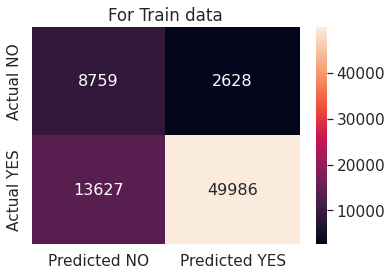

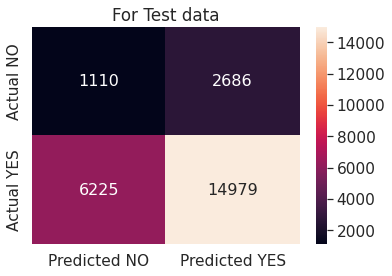

In [220]:
# Confusion Matrix
get_confusion_matrix(nb_1,x,y_train_1)
plt.title('For Train data')
plt.show()

get_confusion_matrix(nb_1,x_te,y_test)
plt.title('For Test data')
plt.show()

In [221]:
# Plot the ROC-AUC curves using the probability predictions made on train and test data.

In [222]:
from sklearn.metrics import roc_auc_score

# predict probabilities
pred_prob_1 = nb_1.predict_proba(x_te)

# auc scores
auc_score = roc_auc_score(y_test, pred_prob_1[:,1])

print('AUC Score - ',auc_score)


AUC Score -  0.509629299321022


In [223]:
# For best  threshold
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, pred_prob_1[:,1])

best_idx = np.argmax(tpr*(1- fpr))
best_threshold = thresholds[best_idx]

best_threshold

0.6872561813240533

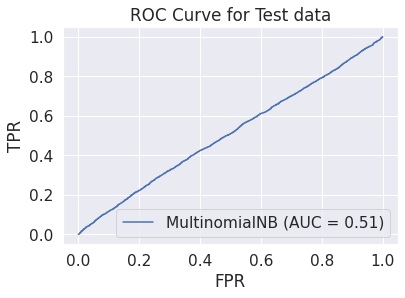

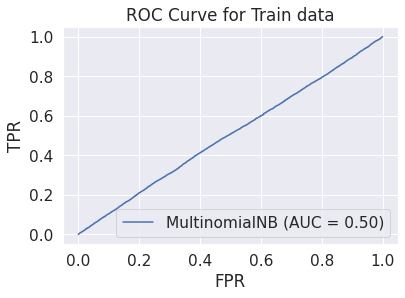

In [224]:
from sklearn import metrics

metrics.plot_roc_curve(nb_1, x_te, y_test)
plt.title('ROC Curve for Test data')
plt.xlabel('FPR')
plt.ylabel('TPR')
metrics.plot_roc_curve(nb_1, x_tr, y_train)
plt.title('ROC Curve for Train data')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

#### Set 2

In [225]:
# Perform Hyperparameter Tuning.
# Plot the training and the CV AUC scores, for different values of 'alpha', using a 2D line plot


In [226]:
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
import math

train_auc = []
cv_auc = []
log_alphas = []

alphas = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10,  100,  1000]

for i in tqdm(alphas):
    nb = MultinomialNB(alpha = i,class_prior=[0.5,0.5])
    nb.fit(x_tr_tf, y_train)

    y_train_pred = batch_predict(nb, x_tr_tf)    
    y_cv_pred = batch_predict(nb, x_c_tf)
    

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

for a in tqdm(alphas):
    b = math.log(a)
    log_alphas.append(b)

100%|██████████| 9/9 [00:00<00:00, 67408.46it/s]


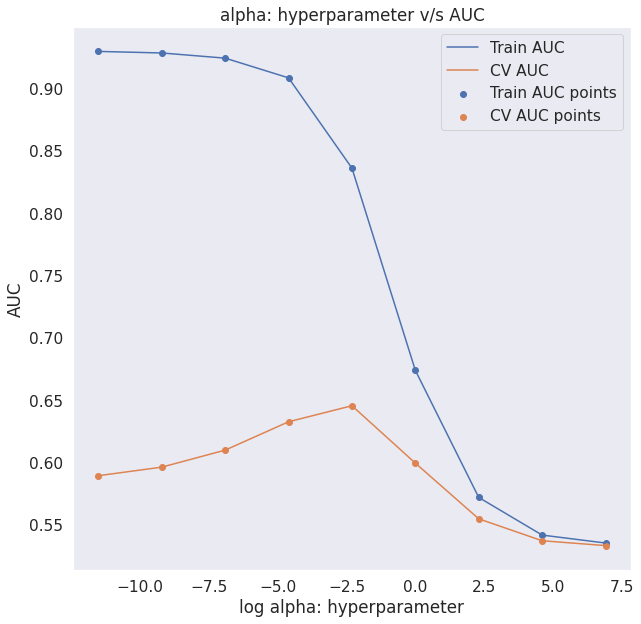

In [227]:
plt.figure(figsize=(10,10))
plt.plot(log_alphas, train_auc, label='Train AUC')
plt.plot(log_alphas, cv_auc, label='CV AUC')

plt.scatter(log_alphas, train_auc, label='Train AUC points')
plt.scatter(log_alphas, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("log alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("alpha: hyperparameter v/s AUC")
plt.grid()
plt.show()

In [228]:
from sklearn.model_selection import GridSearchCV

nb = MultinomialNB(class_prior=[0.5,0.5])

parameters = {'alpha':[0.00001, 0.0001,0.001, 0.01, 0.1,0.5,0.8, 1, 10,  100,  1000]}

clf = GridSearchCV(nb, parameters, cv= 10, scoring='roc_auc',return_train_score=True,verbose=2)

clf.fit(x_tr_tf, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

Fitting 10 folds for each of 11 candidates, totalling 110 fits
[CV] END ........................................alpha=1e-05; total time=   0.1s
[CV] END ........................................alpha=1e-05; total time=   0.1s
[CV] END ........................................alpha=1e-05; total time=   0.1s
[CV] END ........................................alpha=1e-05; total time=   0.1s
[CV] END ........................................alpha=1e-05; total time=   0.1s
[CV] END ........................................alpha=1e-05; total time=   0.1s
[CV] END ........................................alpha=1e-05; total time=   0.1s
[CV] END ........................................alpha=1e-05; total time=   0.1s
[CV] END ........................................alpha=1e-05; total time=   0.1s
[CV] END ........................................alpha=1e-05; total time=   0.1s
[CV] END .......................................alpha=0.0001; total time=   0.1s
[CV] END .....................................

In [229]:
# Print params
print(clf.best_estimator_)
print(clf.score(x_tr_tf, y_train))
print(clf.score(x_c_tf, y_cv))

MultinomialNB(alpha=0.1, class_prior=[0.5, 0.5])
0.8360001749193261
0.645452607607835


In [230]:
# Obtain the optimal value for 'alpha' and using the obtained optimal 'alpha' value, fit a multinomial naive bayes model, on the train data,
# Note: If you have split the datase into 3 parts (ie., train, cv and test sets) in the beginning, then the training data for this final model would be (train set + cv set)
# Make class label and probability predictions on the train and test data.


In [231]:
from scipy.sparse import vstack # for vertical stacking
x = vstack((x_tr_tf,x_c_tf)).tocsr()
print(x.shape)
print(y_train_1.shape)

(75000, 41834)
(75000,)


In [232]:
nb_2 = MultinomialNB(alpha = 0.001, class_prior=[0.5,0.5])
nb_2.fit(x,y_train_1)

MultinomialNB(alpha=0.001, class_prior=[0.5, 0.5])

In [233]:
# Pick the best threshold among the probability estimates, such that it has to yield maximum value for TPR*(1-FPR)
# Plot the confusion matrices(each for train and test data) afer encoding the predicted class labels, on the basis of the best threshod probability estimate.


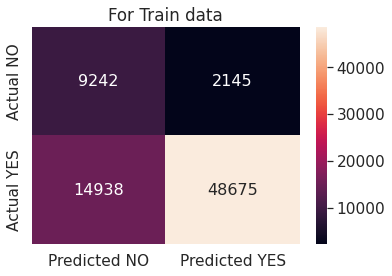

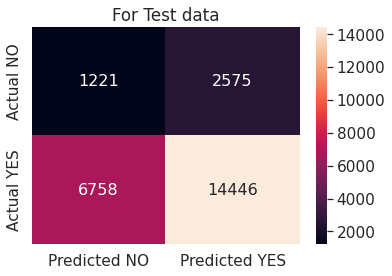

In [234]:
# Confusion Matrix
get_confusion_matrix(nb_2,x,y_train_1)
plt.title('For Train data')
plt.show()

get_confusion_matrix(nb_2,x_te_tf,y_test)
plt.title('For Test data')
plt.show()

In [235]:
from sklearn.metrics import roc_auc_score

# predict probabilities
pred_prob_2 = nb_2.predict_proba(x_te_tf)

# auc scores
auc_score = roc_auc_score(y_test, pred_prob_2[:,1])

print('AUC Score - ',auc_score)


AUC Score -  0.5057692730103014


In [236]:
# For best  threshold
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, pred_prob_2[:,1])

best_idx = np.argmax(tpr*(1- fpr))
best_threshold = thresholds[best_idx]

best_threshold

0.538054579331292

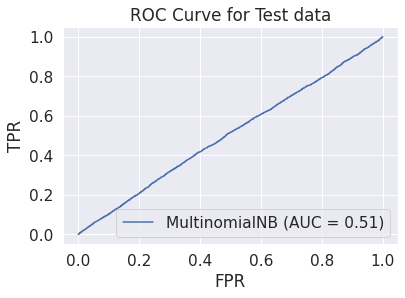

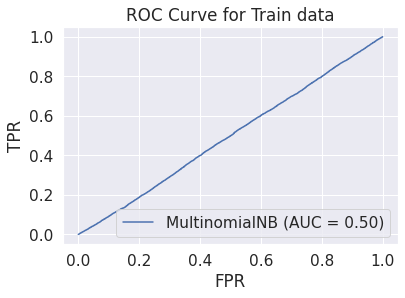

In [237]:
from sklearn import metrics

metrics.plot_roc_curve(nb_2, x_te_tf, y_test)
plt.title('ROC Curve for Test data')
plt.xlabel('FPR')
plt.ylabel('TPR')
metrics.plot_roc_curve(nb_2, x_tr_tf, y_train)
plt.title('ROC Curve for Train data')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

# Task -2

In [238]:
# Either from set 1 (or) set 2, print the names of the top 20 features associated with the positive and negative classes each. (You have to print the names of the features, but not the indexes)


In [239]:
bow_features = []

# for Categorical Features
bow_features.extend(vectorizer_bow.get_feature_names())

bow_features.extend(vectorizer_school.get_feature_names())

bow_features.extend(vectorizer_teacher.get_feature_names())

bow_features.extend(vectorizer_grade.get_feature_names())

bow_features.extend(vectorizer_clean_cat.get_feature_names())

bow_features.extend(vectorizer_clean_sub_cat.get_feature_names())

# For Numerical features
bow_features.append("price")

bow_features.append("teacher_number_of_previously_posted_projects")

print(len(bow_features))

41834


In [240]:
positive=list(np.argsort((nb_1.feature_log_prob_)[1]))
positive.reverse()
positive_featuers=np.array(bow_features)[np.array(positive[:10])]
positive_featuers

array(['price', 'students', 'nannan', 'school', 'my',
       'teacher_number_of_previously_posted_projects', 'learning',
       'classroom', 'not', 'learn'], dtype='<U44')

In [241]:
negetive=list(np.argsort((nb_1.feature_log_prob_)[0]))
negetive.reverse()
negetive_featuers=np.array(bow_features)[np.array(negetive[:10])]
negetive_featuers

array(['price', 'students', 'nannan', 'school', 'my',
       'teacher_number_of_previously_posted_projects', 'learning',
       'classroom', 'not', 'the'], dtype='<U44')

<h1>3. Summary</h1>

<br> as mentioned in the step 5 of instructions

In [242]:
#Summarize your assignment work here in a few points, and also compare the final models (from set 1 and set 2), in terms of optimal hyperparameter value 'alpha', training AUC and test AUC scores.
# You can either use a pretty table or any other tabular structure.
# Reference Link for Pretty table:  https://pypi.org/project/prettytable/

In [244]:
from prettytable import PrettyTable
table = PrettyTable()

table.field_names = ["Vectorizer", "Model", "Hyper-parameter (Alpha)", "AUC Score","Best Threshold"]
table.add_row(["BOW", "Naive Bayes", 0.1, 0.50, 0.68])
table.add_row(["TFIDF", "Naive Bayes", 0.01, 0.50, 0.533])

print(table)

+------------+-------------+-------------------------+-----------+----------------+
| Vectorizer |    Model    | Hyper-parameter (Alpha) | AUC Score | Best Threshold |
+------------+-------------+-------------------------+-----------+----------------+
|    BOW     | Naive Bayes |           0.1           |    0.5    |      0.68      |
|   TFIDF    | Naive Bayes |           0.01          |    0.5    |     0.533      |
+------------+-------------+-------------------------+-----------+----------------+
